<a href="https://colab.research.google.com/github/Praveen871/Data-Wrangling/blob/master/Copy_of_Data_Wrangling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling Project - Twitter Account WeRateDogs**




In this project I will wrangle and analyze the tweet archive of Twitter user **@dog_rates**, also known as **WeRateDogs**. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. WeRateDogs asks people to send photos of their dogs which are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10".

## Gather

Gather 3 pieces of data:
* The WeRateDogs Twitter archive: twitter_archive_enhanced.csv
* The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
* Queried the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data in a file called tweet_json.txt file.

In [0]:
#import libraries
import pandas as pd
import requests
import tweepy
import json
import re
from datetime import datetime
import time
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1U28pD0Q93m7tBOSkcOX5nA8WTBgiLd16'}) # replace the id with id of file you want to access
downloaded.GetContentFile('twitter-archive-enhanced.csv') 

In [0]:
#read the twitter archive file
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [0]:
#import the tweet image predictions using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
#read the image predictions file
images = pd.read_csv('image-predictions.tsv', sep = '\t')

In [0]:
#access Twitter API
consumer_key = 'nUEeHOOUee42DaNHa7l3EX1wv'
consumer_secret = 'Y232RMHyf1YCsjPLZV0LmdHrD0942AjyPHcIibYUwrtzBORkFs'
access_token = '988144052439838722-qv8g4xTxhB1LcytyAk94oUukgcPjmJ3'
access_secret = 'iXC8lzHUHjj5mx2EDIRHnFYEPlsLbzpjozbzASS73RpBc'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [0]:
#add tweets to tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 760
Rate limit reached. Sleeping for: 760


In [0]:
#append the tweets to a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [0]:
#create the json_tweets data frame
json_tweets = pd.DataFrame()

In [0]:
#add the necessary columns to the data frame
json_tweets['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
json_tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
json_tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

## Assess

After gathering each of the above pieces of data, I assessed them visually and programmatically for quality and tidiness issues. 

In [0]:
#display the the twitter archive
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [0]:
#display the images predictions data frame
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [0]:
#display the json tweets data frame
json_tweets

,id,retweet_count,favorite_count
0,892420643555336193,7725,36297
1,892177421306343426,5718,31301
2,891815181378084864,3786,23568
3,891689557279858688,7888,39595
4,891327558926688256,8506,37811
...,...,...,...
5531,666049248165822465,39,96
5532,666044226329800704,132,272
5533,666033412701032449,41,112
5534,666029285002620928,42,121


In [0]:
#display info of twitter archive
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [0]:
#display statistics for twitter archive
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [0]:
#display info for images predictions
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [0]:
#display statistics for images predictions
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [0]:
#display info for json tweets
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5536 entries, 0 to 5535
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              5536 non-null   int64
 1   retweet_count   5536 non-null   int64
 2   favorite_count  5536 non-null   int64
dtypes: int64(3)
memory usage: 129.9 KB


In [0]:
#display statistics for json_tweets
json_tweets.describe()

,id,retweet_count,favorite_count
count,5.536000e+03,5536.000000,5536.000000
mean,7.542594e+17,3035.130238,8577.076048
std,7.033537e+16,4775.473052,12470.139306
min,6.660209e+17,1.000000,0.000000
25%,6.829238e+17,624.000000,1395.000000
50%,7.501095e+17,1609.000000,3886.000000
75%,8.159907e+17,3563.000000,11221.000000
max,8.924206e+17,78064.000000,156653.000000


In [0]:
#check the number of sources in twitter archive
twitter.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [0]:
#check if there are any duplicate tweet ids in twitter archive
sum(twitter.tweet_id.duplicated())

0

In [0]:
#check names in twitter archive
twitter.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
life         1
Timofy       1
Iggy         1
Anna         1
Kendall      1
Name: name, Length: 957, dtype: int64

In [0]:
#sort names
twitter.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [0]:
#check the number of images
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [0]:
#check if there are any duplicates tweet_ids in images dataframe
sum(images.tweet_id.duplicated())

0

In [0]:
#check duplicates ids in json tweets
sum(json_tweets.id.duplicated())

3205

## **Quality**

`twitter` data frame

* Text lines contain links
* timestamp column is a string
* Missing dog names (replaced with 'None')
* Incorrect dog names
* Rating denominator higher than 10
* Retweets present in the file: texts start with "RT @"
* "&amp" characters present in text 

`images` data frame
* Some breed names have the first letter lowercase in p1, p2, p3 columns

## **Tidiness**

* Irrelevant columns in `twitter` data frame: "in_reply_to_status_id", "in_reply_to_user_id", "source", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"
* Column name timestamp to be renamed in `twitter` data frame
* Column name "expanded_url" not explicit enough in `twitter` data frame
* Dog stages split into 4 different columns in `twitter` dataframe
* "id" column name from `json_tweets` data frame not aligned with the rest of data frames
* 3 separate data frames


## **Clean**

Cleaned each of the issues I documented while assessing.

In [0]:
#create copies of the 3 data frames
twitter_clean = twitter.copy()
images_clean = images.copy()
json_clean = json_tweets.copy()

## Quality

`twitter`: **Text lines contain links**

***Define***

Remove the links contained in the text lines.

***Code***

In [0]:
#create a regex pattern in order to define the URLs that are present in the text column
pattern = r"http\S+"

In [0]:
#write a for loop to remove all URLs from line texts
clean_text = []

for line in twitter_clean['text']:
    clean_text.append(re.sub(pattern, "", line))
    
twitter_clean['text'] = clean_text

***Test***

In [0]:
#check the new variable text ans select a random row
twitter_clean['text'][1445]

'Oh my god 10/10 for every little hot dog pupper'

`twitter`: **timestamp column is a string**

***Define***

Convert timestamp column from string to date.

***Code***

In [0]:
#create a for loop to convert each string timestamp to a date
dates = []

for date in twitter_clean['timestamp']:
    dates.append(datetime.strptime(date, "%Y-%m-%d %H:%M:%S +0000").date())
    
    
twitter_clean['timestamp'] = dates

***Test***

In [0]:
#check column timestamp
twitter_clean['timestamp'].sample(4)

1858    2015-12-12
1087    2016-06-01
2294    2015-11-19
199     2017-04-17
Name: timestamp, dtype: object

`twitter`: **Missing dog names (replaced with 'None')**

***Define***

Remove the lines that have the name of the dog "None".

***Code***

In [0]:
#count the number of lines that have the name of the dog "None"
sum(twitter_clean.name == "None")

745

In [0]:
#remove these lines
twitter_clean = twitter_clean[twitter_clean.name != "None"]

###Test###

In [0]:
#check if there are any "None" names left
sum(twitter_clean.name == "None")

0

`twitter`: **Incorrect dog names**

***Define***

Remove the lines that have incorrect dog names.

###Code###

In [0]:
#find the lower case names in twitter clean and confirm they are not real names
lower = []

for word in twitter_clean['name']:
    if word.islower():
         lower.append(word)
            
Counter(lower)

Counter({'a': 55,
         'actually': 2,
         'all': 1,
         'an': 7,
         'by': 1,
         'getting': 2,
         'his': 1,
         'incredibly': 1,
         'infuriating': 1,
         'just': 4,
         'life': 1,
         'light': 1,
         'mad': 2,
         'my': 1,
         'not': 2,
         'officially': 1,
         'old': 1,
         'one': 4,
         'quite': 4,
         'space': 1,
         'such': 1,
         'the': 8,
         'this': 1,
         'unacceptable': 1,
         'very': 5})

In [0]:
#create a df only with the first letter in names that is uppercase
twitter_clean = twitter_clean[twitter_clean.name.map(lambda word: word.istitle())]

###Test###

In [0]:
#check if there are any lowercase letter names left
lower2 = []

for word in twitter_clean['name']:
    if word.islower():
         lower2.append(word)
            
Counter(lower2)

Counter()

`twitter`: **Rating denominator higher than 10**

***Define***

Remove the lines that have a denominator higher than 10.

###Code###

In [0]:
#chech the value counts of the rating denominator
twitter_clean['rating_denominator'].value_counts()

10    1493
50       1
11       1
7        1
Name: rating_denominator, dtype: int64

In [0]:
#see the lines
twitter_clean[twitter_clean.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [0]:
#create df with rating denominators lower than 10
twitter_clean = twitter_clean[twitter_clean.rating_denominator <=  10]

###Test###

In [0]:
#confirm changes
twitter_clean[twitter_clean.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`twitter`: **Retweets present in the file: texts start with "RT @"**

***Define***

Remove the text retweets starting with "RT @", as we are looking only for original tweets.

###Code###

In [0]:
#remove lines containing &amp
twitter_clean = twitter_clean[~twitter_clean['text'].str.contains("&amp")]

###Test###

In [0]:
#confirm changes
twitter_clean[twitter_clean['text'].str.contains("&amp")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


`images`: **Some breed names have the first letter lowercase in p1, p2, p3 columns**

***Define***

Remove the characters "&amp" from text.

***code***

In [0]:
#check the df
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [0]:
#capitalize first letter for dog breeds
images_clean['p1'] = images_clean.p1.str.title()
images_clean['p2'] = images_clean.p2.str.title()
images_clean['p3'] = images_clean.p3.str.title()

***Test***

In [0]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tidiness

**Irrelevant columns in `twitter` data frame: "in_reply_to_status_id", "in_reply_to_user_id", "source", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"**

In [0]:
#check the columns
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 2325
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1452 non-null   int64  
 1   in_reply_to_status_id       1 non-null      float64
 2   in_reply_to_user_id         1 non-null      float64
 3   timestamp                   1452 non-null   object 
 4   source                      1452 non-null   object 
 5   text                        1452 non-null   object 
 6   retweeted_status_id         109 non-null    float64
 7   retweeted_status_user_id    109 non-null    float64
 8   retweeted_status_timestamp  109 non-null    object 
 9   expanded_urls               1452 non-null   object 
 10  rating_numerator            1452 non-null   int64  
 11  rating_denominator          1452 non-null   int64  
 12  name                        1452 non-null   object 
 13  doggo                       1452 

In [0]:
#drop the columns
twitter_clean = twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'] , axis=1)

***Test***

In [0]:
#check the columns
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1452 non-null   int64 
 1   timestamp           1452 non-null   object
 2   text                1452 non-null   object
 3   expanded_urls       1452 non-null   object
 4   rating_numerator    1452 non-null   int64 
 5   rating_denominator  1452 non-null   int64 
 6   name                1452 non-null   object
 7   doggo               1452 non-null   object
 8   floofer             1452 non-null   object
 9   pupper              1452 non-null   object
 10  puppo               1452 non-null   object
dtypes: int64(3), object(8)
memory usage: 136.1+ KB


In [0]:
twitter_clean.to_csv('twitter_clean.csv')

**Column name timestamp to be renamed in `twitter` data frame**

***Define***

Rename the timestamp column into date column.

***Code***

In [0]:
#rename the column
twitter_clean = twitter_clean.rename(columns = {'timestamp':'date'})

***Test***

In [0]:
#check names of columns
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1452 non-null   int64 
 1   date                1452 non-null   object
 2   text                1452 non-null   object
 3   expanded_urls       1452 non-null   object
 4   rating_numerator    1452 non-null   int64 
 5   rating_denominator  1452 non-null   int64 
 6   name                1452 non-null   object
 7   doggo               1452 non-null   object
 8   floofer             1452 non-null   object
 9   pupper              1452 non-null   object
 10  puppo               1452 non-null   object
dtypes: int64(3), object(8)
memory usage: 136.1+ KB


**Column name "expanded_urls" not explicit enough in `twitter` data frame**

***Define***

Change the name of the 'expanded_urls' column into 'img_url'.

***Code***

In [0]:
#rename the column
twitter_clean = twitter_clean.rename(columns = {'expanded_urls':'img_url'})

***Test***

In [0]:
#check the new columns
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 2325
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1452 non-null   int64 
 1   date                1452 non-null   object
 2   text                1452 non-null   object
 3   img_url             1452 non-null   object
 4   rating_numerator    1452 non-null   int64 
 5   rating_denominator  1452 non-null   int64 
 6   name                1452 non-null   object
 7   doggo               1452 non-null   object
 8   floofer             1452 non-null   object
 9   pupper              1452 non-null   object
 10  puppo               1452 non-null   object
dtypes: int64(3), object(8)
memory usage: 136.1+ KB


**Dog stages split into 4 different columns in `twitter` dataframe**

***Define***

Create a single variable with dog stages.

***Code***

In [0]:
#melt the columns with dog stages
twitter_clean = pd.melt(twitter_clean, id_vars = ['tweet_id', 'date', 'text', 'img_url', 'rating_numerator', 'rating_denominator', 'name'], var_name = 'dog', value_name = 'dog_stage')

In [0]:
twitter_clean.head(1)

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog,dog_stage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None


In [0]:
#drop the value column
twitter_clean = twitter_clean.drop('dog', axis = 1)

***Test***

In [0]:
#check the new df
twitter_clean.head(100)

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
...,...,...,...,...,...,...,...,...
95,866816280283807744,2017-05-23,RT @dog_rates: This is Jamesy. He gives a kiss...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None
96,866686824827068416,2017-05-22,This is Lili. She can't believe you betrayed h...,https://twitter.com/dog_rates/status/866686824...,12,10,Lili,None
97,866450705531457537,2017-05-22,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None
98,866334964761202691,2017-05-21,This is Coco. At first I thought she was a clo...,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None


**"id" column name from `json_tweets` data frame not aligned with the rest of data frames**

***Define***

Change the column name "id" into "tweet_id" in json_tweets data frame.

***Code***

In [0]:
#rename the id column into tweet_id
json_clean = json_clean.rename(columns = {'id':'tweet_id'})

***Test***

In [0]:
#confirm changes
json_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7725,36297
1,892177421306343426,5718,31301


**3 separate data frames**

***Define***

Merge all 3 data frames by tweet_id.

***Code***

In [0]:
#merge all 3 data frames by tweet id
twitter_images = pd.merge(twitter_clean, images_clean, on = 'tweet_id', how='left')
twitter_master = pd.merge(twitter_images, json_clean, on = 'tweet_id', how='left')

***Test***

In [0]:
#confirm changes
twitter_master.head(1)

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,7725.0,36297.0


In [0]:
#store file
twitter_master.to_csv('twitter_archive_master.csv')

## **Analysis & Visualization**

### Check Dataset

In [0]:
#view the first lines in twitter master dataset
twitter_master.head()

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7725.0,36297.0
1,892420643555336193,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,7725.0,36296.0
2,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5718.0,31301.0
3,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5718.0,31301.0
4,892177421306343426,2017-08-01,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5718.0,31302.0


In [0]:
#check info
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14048 entries, 0 to 14047
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            14048 non-null  int64  
 1   date                14048 non-null  object 
 2   text                14048 non-null  object 
 3   img_url             14048 non-null  object 
 4   rating_numerator    14048 non-null  int64  
 5   rating_denominator  14048 non-null  int64  
 6   name                14048 non-null  object 
 7   dog_stage           14048 non-null  object 
 8   jpg_url             12984 non-null  object 
 9   img_num             12984 non-null  float64
 10  p1                  12984 non-null  object 
 11  p1_conf             12984 non-null  float64
 12  p1_dog              12984 non-null  object 
 13  p2                  12984 non-null  object 
 14  p2_conf             12984 non-null  float64
 15  p2_dog              12984 non-null  object 
 16  p3  

In [0]:
#check if there are any duplicates
sum(twitter_master.duplicated())

11848

In [0]:
#drop duplicates
twitter_master = twitter_master.drop_duplicates()

In [0]:
#confirm duplicates removed
sum(twitter_master.duplicated())

0

In [0]:
#check info
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 12636
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2200 non-null   int64  
 1   date                2200 non-null   object 
 2   text                2200 non-null   object 
 3   img_url             2200 non-null   object 
 4   rating_numerator    2200 non-null   int64  
 5   rating_denominator  2200 non-null   int64  
 6   name                2200 non-null   object 
 7   dog_stage           2200 non-null   object 
 8   jpg_url             2049 non-null   object 
 9   img_num             2049 non-null   float64
 10  p1                  2049 non-null   object 
 11  p1_conf             2049 non-null   float64
 12  p1_dog              2049 non-null   object 
 13  p2                  2049 non-null   object 
 14  p2_conf             2049 non-null   float64
 15  p2_dog              2049 non-null   object 
 16  p3   

In [0]:
#columns that have missing values
twitter_master.columns[twitter_master.isnull().any()]

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [0]:
#drop rows with missing values
twitter_master = twitter_master.dropna()

In [0]:
#check info
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 12636
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2036 non-null   int64  
 1   date                2036 non-null   object 
 2   text                2036 non-null   object 
 3   img_url             2036 non-null   object 
 4   rating_numerator    2036 non-null   int64  
 5   rating_denominator  2036 non-null   int64  
 6   name                2036 non-null   object 
 7   dog_stage           2036 non-null   object 
 8   jpg_url             2036 non-null   object 
 9   img_num             2036 non-null   float64
 10  p1                  2036 non-null   object 
 11  p1_conf             2036 non-null   float64
 12  p1_dog              2036 non-null   object 
 13  p2                  2036 non-null   object 
 14  p2_conf             2036 non-null   float64
 15  p2_dog              2036 non-null   object 
 16  p3   

**In the above assessment I have found the following:**

    - No. of observations in the dataset: 2786
    - No. of columns in the dataset: 21
    - 7867 duplicate rows removed
    - Rows with missing values removed

### Descriptive Statistics

In [0]:
#descriptive statistics
twitter_master.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.036000e+03,2036.000000,2036.0,2036.00000,2036.000000,2.036000e+03,2.036000e+03,2036.000000,2036.000000
mean,7.582843e+17,12.756876,10.0,1.24558,0.616720,1.346392e-01,5.814721e-02,3218.629666,10422.096758
std,7.027404e+16,55.373659,0.0,0.62117,0.267978,1.035387e-01,5.088770e-02,4795.965674,13462.897394
min,6.664188e+17,2.000000,10.0,1.00000,0.044333,1.011300e-08,1.740170e-10,18.000000,0.000000
25%,6.874247e+17,10.000000,10.0,1.00000,0.384125,4.944190e-02,1.309480e-02,833.750000,2465.000000
50%,7.511921e+17,11.000000,10.0,1.00000,0.618483,1.165320e-01,4.634920e-02,1907.500000,6128.000000
75%,8.190052e+17,12.000000,10.0,1.00000,0.871283,1.986600e-01,9.133133e-02,3700.000000,14099.500000
max,8.924206e+17,1776.000000,10.0,4.00000,1.000000,4.880140e-01,2.710420e-01,56914.000000,121007.000000


In [0]:
#count the number of ratings numerator
twitter_master['rating_numerator'].value_counts()

12      532
11      462
10      355
13      315
9       119
8        95
14       48
7        46
6        24
5        16
3        11
4         5
1776      2
75        2
27        2
2         2
Name: rating_numerator, dtype: int64

**The most common rating numerator is 12/10, followed by 11/10, 10/10 and 13/10. We also have outliers, 1776/10 and 75/10.**

In [0]:
#plot the count of rating numerators between 2 and 14
plt.hist(twitter_master['rating_numerator'], range = (2, 14));
plt.xlabel('Rating Numerator')
plt.ylabel('Frequency')
plt.title('Ratings Distribution')

**Our distribution is left skewed and peaks at 12.**

In [0]:
#count the number of dog stages
twitter_master['dog_stage'].value_counts()

**The most common dog stage is pupper, which is a small dog, ussualy younger, as presented by the @dog_rates account. We also have many dogs that are not classified.**

In [0]:
#filter on dog stages by the median of rating numerator
dogs = twitter_master.groupby(['dog_stage'], as_index = False)['rating_numerator'].median()

dogs

,dog_stage,rating_numerator
0,None,11
1,doggo,12
2,floofer,12
3,pupper,11
4,puppo,12


**The average rating numerator by dog stage is between 11 and 12.**

In [0]:
#highest rated dog
twitter_master['rating_numerator'].value_counts()

12      532
11      462
10      355
13      315
9       119
8        95
14       48
7        46
6        24
5        16
3        11
4         5
1776      2
75        2
27        2
2         2
Name: rating_numerator, dtype: int64

**We have an outlier in the ratings numerators: 1776/10. Let's see more details.**

In [0]:
#check highest rated dog
twitter_master[twitter_master.rating_numerator == 1776]

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1979,749981277374128128,2016-07-04,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,Bow_Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2478.0,5147.0
1980,749981277374128128,2016-07-04,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1.0,Bow_Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2479.0,5147.0


**The highest rated dog is named Atticus. The number of favorites is 5525 and 5523.**

In [0]:
#check the lowest rating numerator
twitter_master[twitter_master.rating_numerator == 2]

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2924,678424312106393600,2015-12-20,This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,None,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1.0,Maltese_Dog,0.759945,True,Toy_Poodle,0.101194,True,Shih-Tzu,0.056037,True,2517.0,5429.0
3046,674265582246694913,2015-12-08,This is Henry. He's a shit dog. Short pointy e...,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,None,https://pbs.twimg.com/media/CVt49k_WsAAtNYC.jpg,1.0,Slug,0.998075,False,Ice_Lolly,0.000984,False,Leafhopper,0.000097,False,817.0,1596.0


**The smallest rating are given to Crystal and Henry.**

Text(0, 0.5, 'Count')

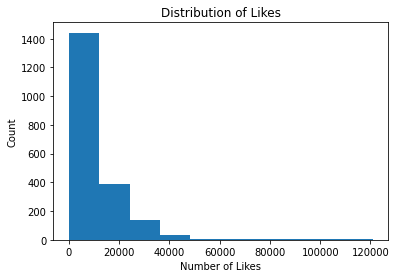

In [0]:
#create histogram for likes
plt.hist(twitter_master['favorite_count']);
plt.title('Distribution of Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Count')

In [0]:
#median number of likes
twitter_master.favorite_count.median()

6128.0

In [0]:
#view the dog that has the highest number of likes
twitter_master[twitter_master.favorite_count == 124644]

,tweet_id,date,text,img_url,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


Text(0, 0.5, 'Likes')

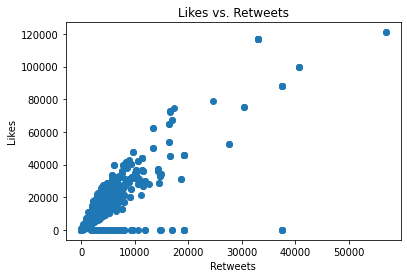

In [0]:
#create scatter plot between retweets and favorites
plt.scatter(twitter_master['retweet_count'], twitter_master['favorite_count']);
plt.title('Likes vs. Retweets')
plt.xlabel('Retweets')
plt.ylabel('Likes')

**There is a strong positive correlation between retweets and favorites.**